# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Deb St. Cyr  
Link  https://github.com/14dstcyr/Project-6-Web-Scraping


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [9]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed')

Package            VersionAll prereqs installed

------------------ -----------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurhash


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Question  1

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [12]:
import requests
from bs4 import BeautifulSoup
import pickle

# Article is added to code
response = requests.get("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/")
contents = response.text

# Write contents to .pkl file
with open('task_01_article_html.pkl', 'wb') as file:
    pickle.dump(contents, file)

### Question 2

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [13]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

#Load pkl file and parse HTML contents via BeautifulSoup
with open('task_01_article_html.pkl', 'rb') as file:
    contents = pickle.load(file)

soup = BeautifulSoup(contents, 'html.parser')

# Print Article Contents
print(soup.get_text())

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

### Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
!python -m spacy download en_core_web_sm  # Installed because I was getting errors


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 187.9 kB/s eta 0:01:08
     --------------------------------------- 0.1/12.8 MB 297.7 kB/s eta 0:00:43
     - -------------------------------------- 0.6/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 6.1 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 7.2 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 8.3 MB/s eta 0:00:02
     ------------ --------------------------- 4.1/12.8 MB 9.4 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 9.9 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.8 MB 10.7 MB/s et

In [3]:
import pickle
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Get html 
with open("article_html.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Get text with Beautifulsoup and parse html    
from bs4 import BeautifulSoup
soup = BeautifulSoup(loaded_html, "html.parser")
article_text = soup.get_text()

# spacy pipeline
nlp = spacy.load("en_core_web_sm") 

# Article with the text
article = nlp(soup.get_text())

# Filter out punctuation, whitespace, and stopwords
tokens = [token.text.lower() for token in article if not token.is_punct and not token.is_stop and not token.is_space]

# The 5 Common Tokens
token_counts = Counter(tokens)

# Name the 5 most common tokens
common_tokens = token_counts.most_common(5)

# Print the 5 most common tokens and frequencies
print("5 Common Tokens in the Article:")
for token, freq in common_tokens:
    print(f"The token {token} has a frequency of {freq}")

5 Common Tokens in the Article:
The token comment has a frequency of 136
The token march has a frequency of 133
The token 2021 has a frequency of 133
The token says has a frequency of 132
The token report has a frequency of 130


### Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import pickle
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the article HTML
with open("article_html.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Parse the HTML and extract text
soup = BeautifulSoup(loaded_html, "html.parser")
article_text = soup.get_text()

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the lemmas
lemma_counts = Counter(lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_counts.most_common(5)

# Print the 5 most common lemmas with their frequencies
print("5 Most Common Lemmas in the Article:")
for lemma, freq in common_lemmas:
    print(f"The lemma '{lemma}' has a frequency of {freq}")


5 Most Common Lemmas in the Article:
The lemma 'comment' has a frequency of 157
The lemma 'say' has a frequency of 134
The lemma 'march' has a frequency of 133
The lemma '2021' has a frequency of 133
The lemma 'report' has a frequency of 130


### Question 5

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
import spacy

# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Get tokens (words) from each sentence
    tokens = [token.text.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(tokens) == 0:
        return 0
    # Count the interesting tokens in each sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Define scoring by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Get lemmas (base form) from the sentence
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(lemmas) == 0:
        return 0
    # Count number of interesting lemmas in each sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Load article text and spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Get the first sentence of the article
first_sentence = list(doc.sents)[0]

# Interesting tokens and lemmas from questions 3 and 4
interesting_tokens = ["comment", "2021", "march", "says", "report"]  # From Q3 
interesting_lemmas = ["comment", "2021", "march", "say", "report"]  # From Q4

# Calculate scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

Token Score: 0.08620689655172414
Lemma Score: 0.10344827586206896


### Question 6

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

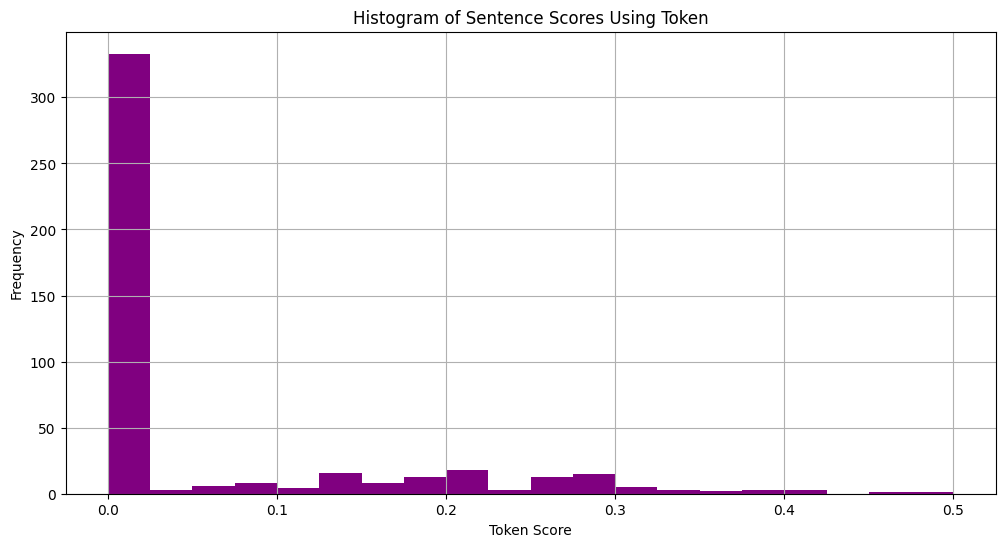

In [ ]:
import spacy
import matplotlib.pyplot as plt 

# Add in html with .pkl identifier
input_file ="article_html.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Extract the text, use Beautifulsoup to parse html
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Define tokens 
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(tokens) == 0:
        return 0
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting tokens (from question 3)
interesting_tokens = ["comment", "2021", "march", "says", "report"]

# List to store token scores of each sentence
token_scores = []

# Count (iterate) over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)

# Plot the histogram of token scores
plt.figure(figsize=(12, 6))
plt.hist(token_scores, bins=20, color='purple')
plt.title("Histogram of Sentence Scores Using Token")
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### The most common range of scores is 0.0 to 0.02 respectively

### Question 7

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

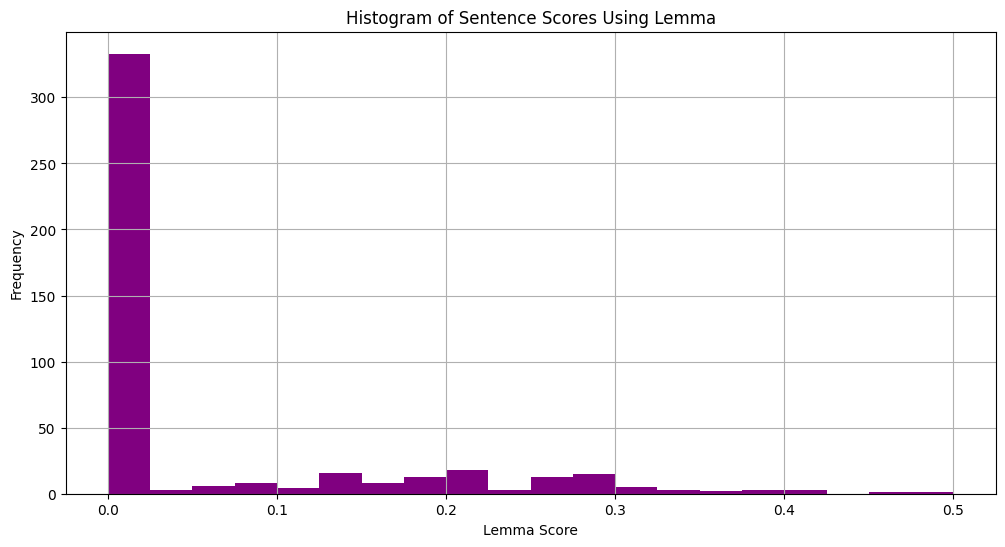

In [8]:
import spacy
import matplotlib.pyplot as plt 

# Add in html with .pkl identifier
input_file ="article_html.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Extract the text, use Beautifulsoup to parse html
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Define tokens 
def score_sentence_by_lemma(sentence, interesting_lemma):
    lemma = [lemma.text.lower() for lemma in sentence if not lemma.is_space and not lemma.is_punct]
    if len(lemma) == 0:
        return 0
    interesting_count = sum(1 for lemma in lemma if lemma in interesting_lemma)
    return interesting_count / len(lemma)

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting tokens (from question 3)
interesting_lemma = ["comment", "2021", "march", "says", "report"]

# List to store token scores of each sentence
lemma_scores = []

# Count (iterate) over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence, interesting_lemma)
    lemma_scores.append(score)

# Plot the histogram of token scores
plt.figure(figsize=(12, 6))
plt.hist(token_scores, bins=20, color='purple')
plt.title("Histogram of Sentence Scores Using Lemma")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### The most common range of scores is 0.0 to 0.02 respectively

### Question 8

Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).